## **RED-WINE QUALITY PREDICTION USING MACHINE LEARNING**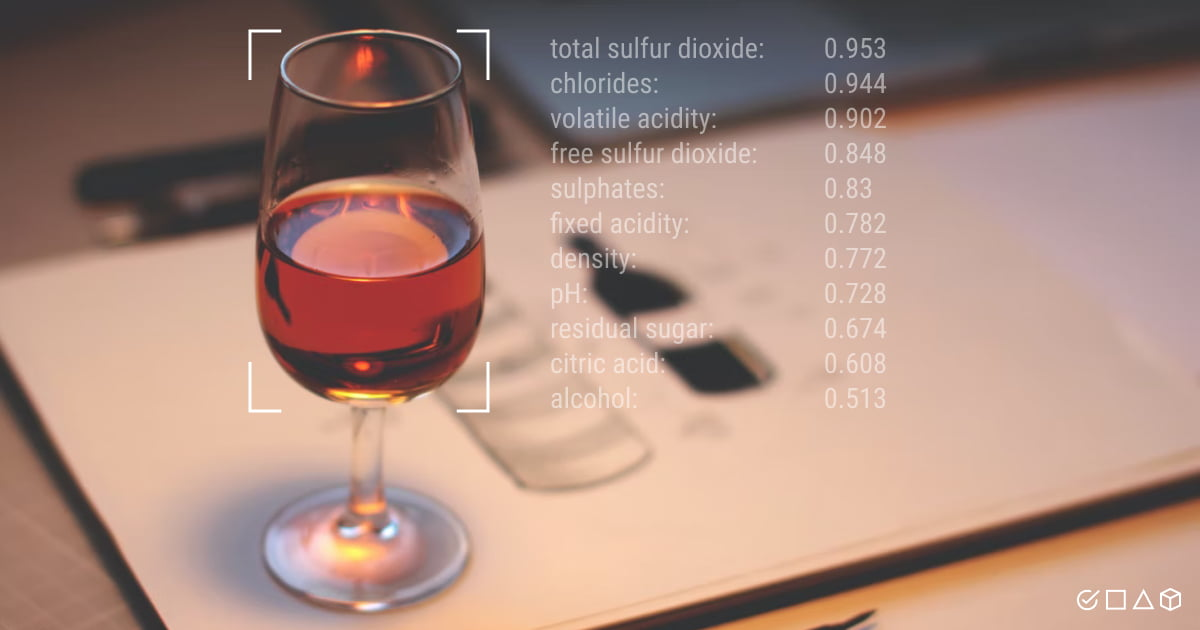

# **ABOUT THE DATASET**

**Context**


**The two datasets are related to red and white variants of the **Portuguese "Vinho Verde" wine. For more details, consult the** **reference [Cortez et al., 2009]. Due to privacy and logistic **issues, only physicochemical (inputs) and sensory (the output)** **variables are available (e.g. there is no data about grape**
**types, **wine brand, wine selling price, etc.).**

**These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).**

# **APPROACH TO QUALITY PREDICTION**

---




*   Import all libaray
*   Load and audit the data
*   Data prepration and Data Transformation
*   Dealing withmissing value
*   Inconsistent value: Replace all transformation with consistent values
*   Dealing With Outliers
*   Data visualization
* Data analysis
*  Uni-variate Analysis(Mean,Median,Mode,Skewness)
*  Bi-variate Analysis(Correlation,Covariance,Chi-Square Test)
*   Multi-Variate Analysis
*   Classification
*   Apply decision tree
*   Apply RandomForest




### **This dataset only has numeric variables:**

### **DESCRIPTION OF QUALITIES**

---


*   **FIXED ACIDITY:** A set of low volatility organic acids such as malic,latic,tartaric. More acids involved with wine or fixed or non-volatile(do not evaporate readily).
*   **ALCOHOL:** Amount of alcohol content in the wine
*   **PH:** The level of acidity. The range is between high acidity to basic acidity i.e (0-14).
*   **VOLATILE ACIDITY:** The amount of acetic acid content which leads to an unpleasant vinegar taste.
*   **SULPHATES:** A wine addictive that contribute to SO2 levels, which acxts as an antimicrobial and antioxidant.
*   **CITRIC ACID:** Amount of citric acid content in wine, which can add freshners and flavor to wine.
*   **CHLORIDES:** The amount of salt content in mineral acids.
*   **TOTAL SULPHUR DIOXIDE:** Total amount of SO2 in wine.
*   **RESIDUAL SUGAR:** The amount of sugar left after fermentation stops(wines, which is greater than 45 litrs or g are sweet)
*   **DENSITY:** The density of water in the wine.
*   **FREE SULPHUR DIOXIDE:** The amount of SO2 in free form. It prevents microbial growth and the oxidation of wine.
*   **QUALITY:** Quality of wine.(score between 0 and 10)

### **IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder

### **IMPORT THE DATASET AND CREATE A DATAFRAME**

In [2]:
#loading the dataset to a pandas dataframe
df = pd.read_csv('/content/winequality-red (1).csv')

### **BASIC DATA EXPLORATION**

---
*   **Head of the dataset**
*   **Number of rows and columns in a dataset**
*   **information of the dataset**
*   **Summary**

In [3]:
#first five rows of the dataset
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
#shape of the dataset
df.shape

(1599, 12)

In [5]:
#info() is used to check the information about data and datatypes of each attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#this helps us to see how data has been spread for numerical values
#we can also see min value,mean value,different percentile value and maximun values

#STATISTICAL INFORMATION OF THE DATA
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#### **CHECKING FOR MISSING VALUES**

In [7]:
#checking for missing values in all columns
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

### **DATA VISUALIZATION**

---


In [9]:
#printing no.of labels for each class
print(df.quality.value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


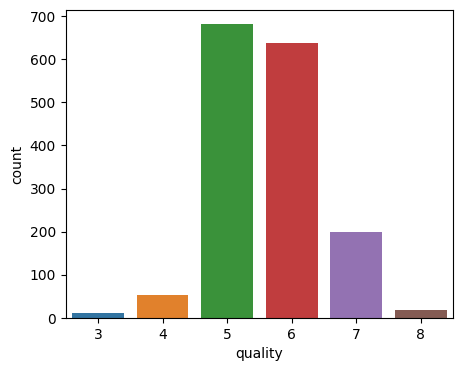

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x ='quality', data = df)
plt.show()

**FIXED ACIDITY VS QUALITY**

<Axes: xlabel='quality', ylabel='fixed acidity'>

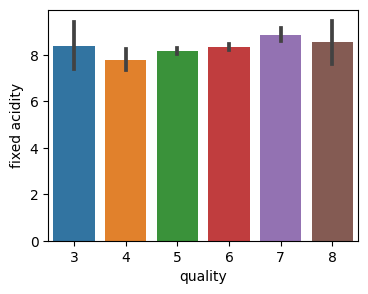

In [11]:
plt.figure(figsize=(4,3))
sns.barplot(x='quality',y= 'fixed acidity',data = df)

**VOLATILE ACIDITY VS QUALITY**

<Axes: xlabel='quality', ylabel='volatile acidity'>

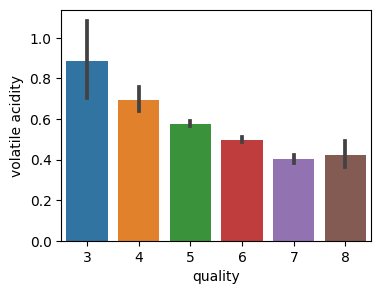

In [12]:
plt.figure(figsize=(4,3))
sns.barplot(x='quality',y= 'volatile acidity',data = df)

**CITRIC ACID VS QUALITY**

<Axes: xlabel='quality', ylabel='citric acid'>

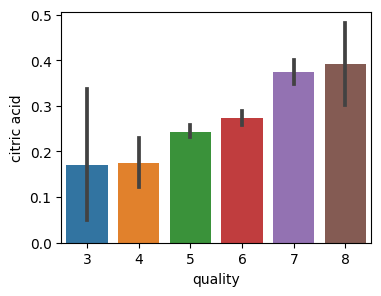

In [13]:
plt.figure(figsize=(4,3))
sns.barplot(x='quality',y= 'citric acid',data = df)

**RESIDUAL SUGAR VS QUALITY**

<Axes: xlabel='quality', ylabel='residual sugar'>

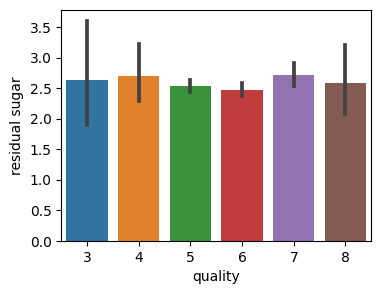

In [14]:
plt.figure(figsize=(4,3))
sns.barplot(x='quality',y= 'residual sugar',data = df)

**CHLORIDES VS QUALITY**

<Axes: xlabel='quality', ylabel='chlorides'>

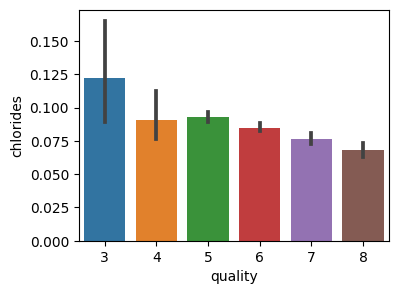

In [15]:
plt.figure(figsize=(4,3))
sns.barplot(x='quality',y= 'chlorides',data = df)

**FREE SULFUR DIOXIDE VS QUALITY**

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

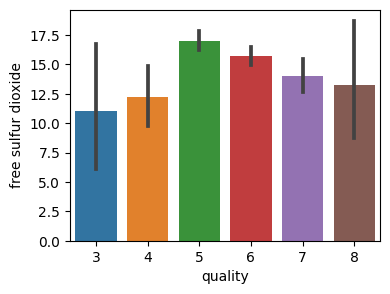

In [16]:
plt.figure(figsize=(4,3))
sns.barplot(x='quality',y= 'free sulfur dioxide',data = df)

**TOTAL SULFUR DIOXIDE VS QUALITY**

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

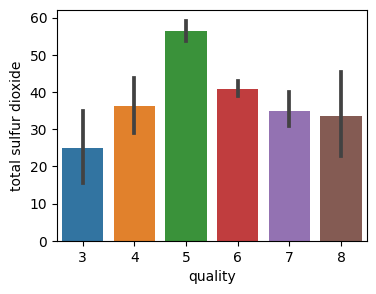

In [17]:
plt.figure(figsize=(4,3))
sns.barplot(x='quality',y= 'total sulfur dioxide',data = df)

**DENSITY VS QUALITY**

<Axes: xlabel='quality', ylabel='density'>

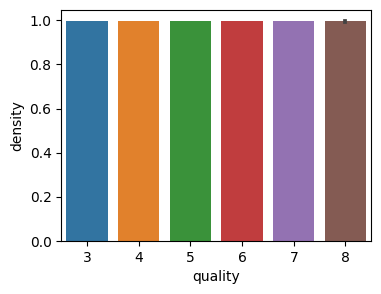

In [18]:
plt.figure(figsize=(4,3))
sns.barplot(x='quality',y= 'density',data = df)

**PH VS QUALITY**

<Axes: xlabel='quality', ylabel='pH'>

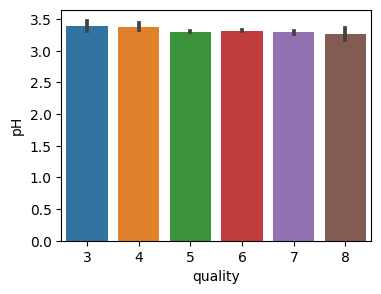

In [19]:
plt.figure(figsize=(4,3))
sns.barplot(x='quality',y= 'pH',data = df)

**SULPHATES VS QUALITY**

<Axes: xlabel='quality', ylabel='sulphates'>

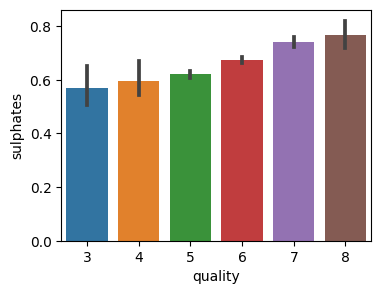

In [20]:
plt.figure(figsize=(4,3))
sns.barplot(x='quality',y= 'sulphates',data = df)

**ALCOHOL VS QUALITY**

<Axes: xlabel='quality', ylabel='alcohol'>

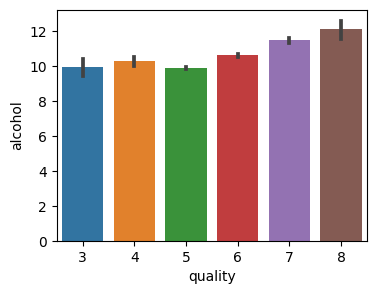

In [21]:
plt.figure(figsize=(4,3))
sns.barplot(x='quality',y= 'alcohol',data = df)

<Axes: >

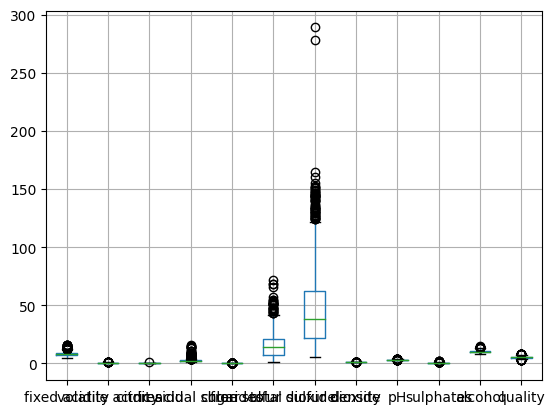

In [22]:
df.boxplot()

In [23]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

### **OUTLIERS**

---
**Plot a boxplot to check for Outliers,where**

**Target variable is Quality. So will plot a boxplot each column against target variable**


<Axes: xlabel='quality', ylabel='fixed acidity'>

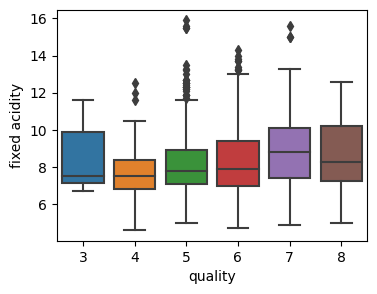

In [24]:
plt.figure(figsize=(4,3))
sns.boxplot(x = 'quality',y = 'fixed acidity', data = df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

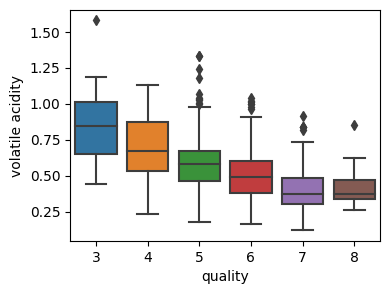

In [25]:
plt.figure(figsize=(4,3))
sns.boxplot(x = 'quality',y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

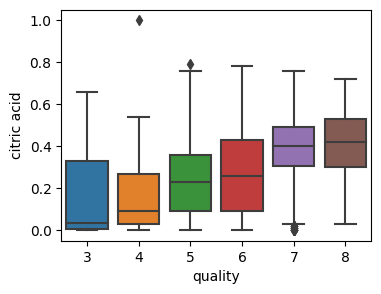

In [26]:
plt.figure(figsize=(4,3))
sns.boxplot(x = 'quality',y = 'citric acid', data = df)


<Axes: xlabel='quality', ylabel='residual sugar'>

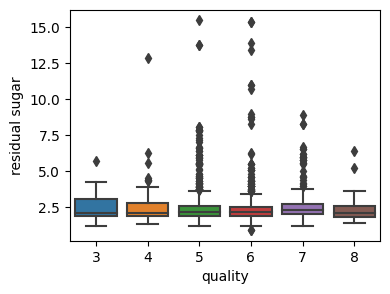

In [27]:
plt.figure(figsize=(4,3))
sns.boxplot(x = 'quality',y = 'residual sugar', data = df)


<Axes: xlabel='quality', ylabel='chlorides'>

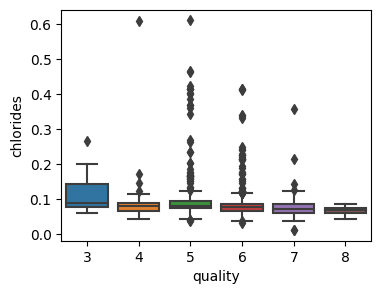

In [28]:
plt.figure(figsize=(4,3))
sns.boxplot(x = 'quality',y = 'chlorides', data = df)


<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

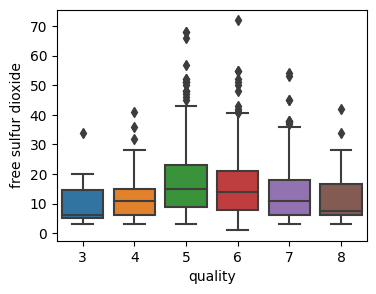

In [29]:
plt.figure(figsize=(4,3))
sns.boxplot(x = 'quality',y = 'free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

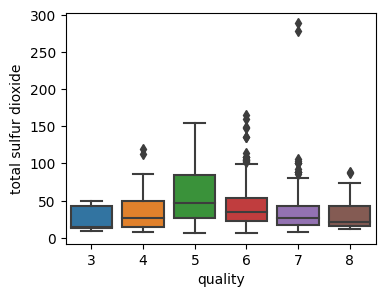

In [30]:
plt.figure(figsize=(4,3))
sns.boxplot(x = 'quality',y = 'total sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='density'>

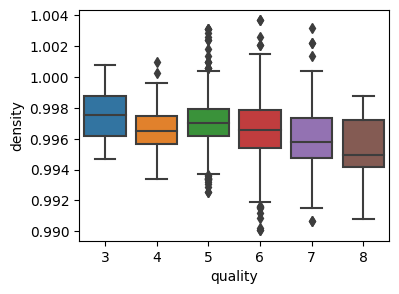

In [31]:
plt.figure(figsize=(4,3))
sns.boxplot(x = 'quality',y = 'density', data = df)

<Axes: xlabel='quality', ylabel='pH'>

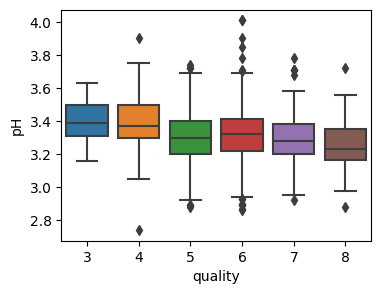

In [32]:
plt.figure(figsize=(4,3))
sns.boxplot(x = 'quality',y = 'pH', data = df)


<Axes: xlabel='quality', ylabel='sulphates'>

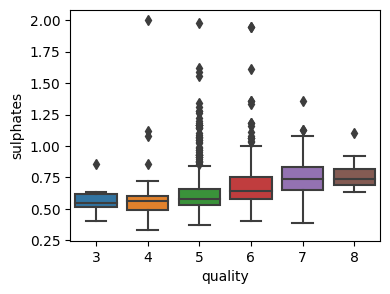

In [33]:
plt.figure(figsize=(4,3))
sns.boxplot(x = 'quality',y = 'sulphates', data = df)

<Axes: xlabel='quality', ylabel='alcohol'>

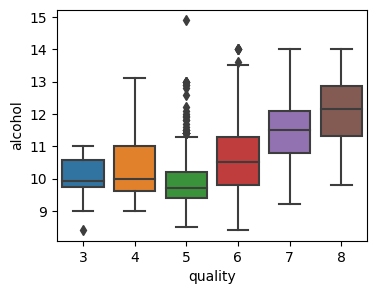

In [34]:
plt.figure(figsize=(4,3))
sns.boxplot(x = 'quality',y = 'alcohol', data = df)


### **REMOVING OUTLIERS**

---



In [37]:
def rmv_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [40]:
low,high=remove_outlier(df['chlorides'])
df['chlorides']=np.where(df['chlorides']>high,high,df['chlorides'])
df['chlorides']=np.where(df['chlorides']<low,low,df['chlorides'])

In [41]:
low,high=remove_outlier(df['free sulfur dioxide'])
df['free sulfur dioxide']=np.where(df['free sulfur dioxide']>high,high,df['free sulfur dioxide'])
df['free sulfur dioxide']=np.where(df['free sulfur dioxide']<low,low,df['free sulfur dioxide'])

In [42]:
low,high=remove_outlier(df['total sulfur dioxide'])
df['total sulfur dioxide']=np.where(df['total sulfur dioxide']>high,high,df['total sulfur dioxide'])
df['total sulfur dioxide']=np.where(df['total sulfur dioxide']<low,low,df['total sulfur dioxide'])

In [44]:
low,high=remove_outlier(df['volatile acidity'])
df['volatile acidity']=np.where(df['volatile acidity']>high,high,df['volatile acidity'])
df['volatile acidity']=np.where(df['volatile acidity']<low,low,df['volatile acidity'])

In [45]:
low,high=remove_outlier(df['fixed acidity'])
df['fixed acidity']=np.where(df['fixed acidity']>high,high,df['fixed acidity'])
df['fixed acidity']=np.where(df['fixed acidity']<low,low,df['fixed acidity'])

In [46]:
low,high=remove_outlier(df['sulphates'])
df['sulphates']=np.where(df['sulphates']>high,high,df['sulphates'])
df['sulphates']=np.where(df['sulphates']<low,low,df['sulphates'])

In [47]:
low,high=remove_outlier(df['alcohol'])
df['alcohol']=np.where(df['alcohol']>high,high,df['alcohol'])
df['alcohol']=np.where(df['alcohol']<low,low,df['alcohol'])

In [48]:
low,high=remove_outlier(df['quality'])
df['quality']=np.where(df['quality']>high,high,df['quality'])
df['quality']=np.where(df['quality']<low,low,df['quality'])

In [50]:
low,high=remove_outlier(df['residual sugar'])
df['residual sugar']=np.where(df['residual sugar']>high,high,df['residual sugar'])
df['residual sugar']=np.where(df['residual sugar']<low,low,df['residual sugar'])

In [51]:
df.skew()

fixed acidity           0.700363
volatile acidity        0.420928
citric acid             0.318337
residual sugar          0.856682
chlorides               0.431683
free sulfur dioxide     0.858967
total sulfur dioxide    0.972642
density                 0.071288
pH                      0.193683
sulphates               0.782787
alcohol                 0.795429
quality                 0.202040
dtype: float64

### **CORRELATION**

---
*   **POSITIVE CORRELATION**
*   **NEGATIVE CORRELATION**


<Axes: >

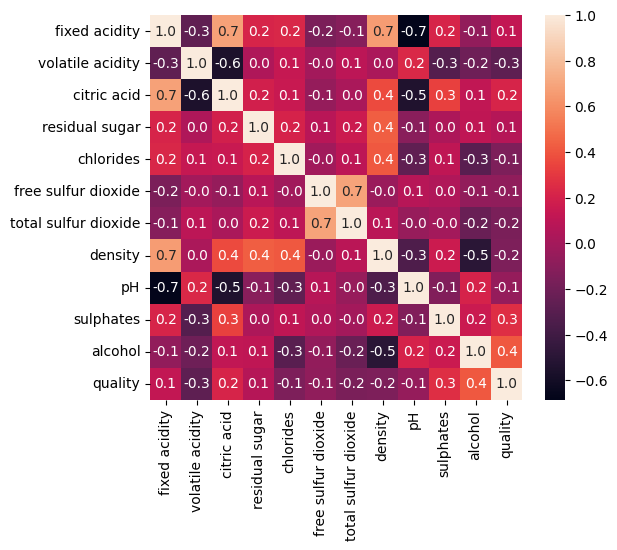

In [62]:
#heatmap construction: to understand the correlation between columns
plt.figure(figsize = (6,5))
sns.heatmap(df.corr(),annot = True,fmt ='0.1f')

In [63]:
df.corr()['quality'].sort_values()

volatile acidity       -0.275343
total sulfur dioxide   -0.160696
density                -0.150460
chlorides              -0.149453
free sulfur dioxide    -0.074189
pH                     -0.057283
residual sugar          0.067727
fixed acidity           0.119607
citric acid             0.214716
sulphates               0.258189
alcohol                 0.409537
quality                 1.000000
Name: quality, dtype: float64

### **PAIRPLOT**

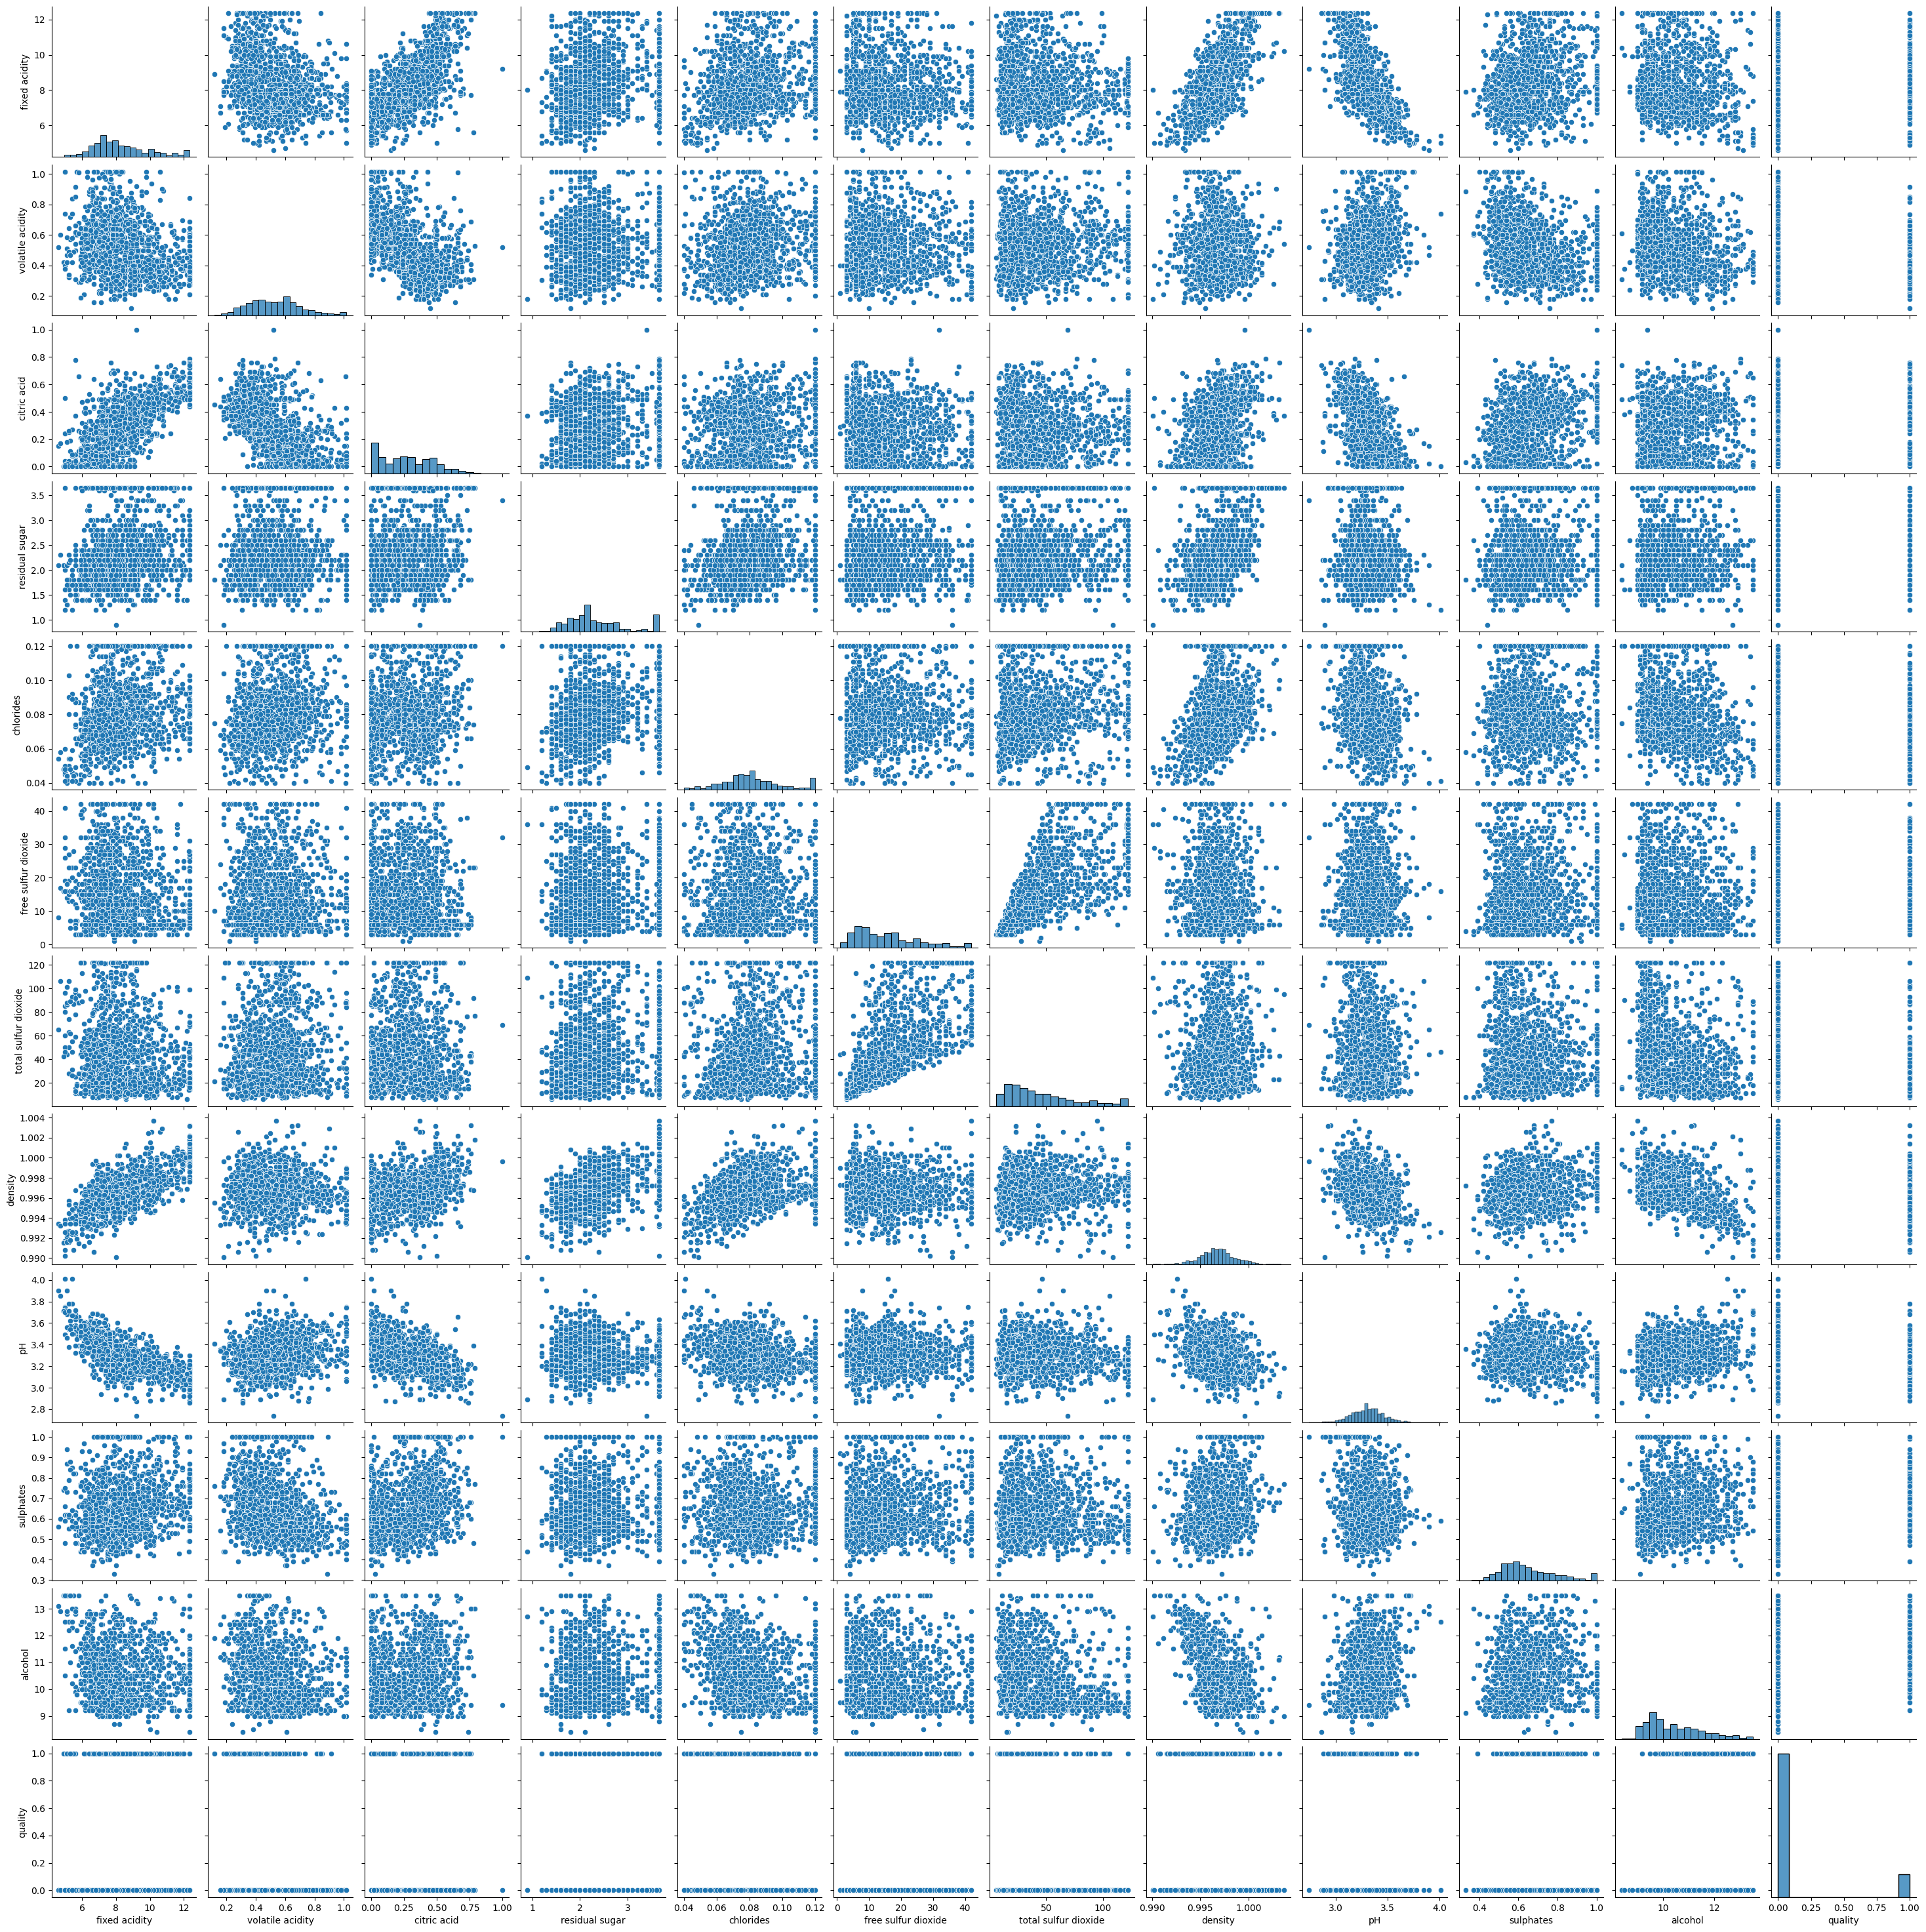

In [64]:
#visualize the relationship between variable content in red wine
sns.pairplot(df)

No correlation between the fields as seen on the pairplot



#### **BINARIZATION OF TARGET VARIABLE**

---

In [54]:
df['quality'].unique()

array([5. , 6. , 7. , 4. , 7.5, 3.5])

In [55]:
df['quality']=df.quality.apply(lambda y_value: 1 if y_value>=7 else 0)

In [58]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

### **DATA PREPROCESSING**

---



In [59]:
x = df.drop('quality', axis =1)
y = df['quality']

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 3)

In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [65]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
preds_ytrain_lr = lr.predict(x_train)
preds_ytest_lr = lr.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix= confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  print('the accuracy of the model',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [67]:
acc_report(y_train,preds_ytrain_lr)

the accuracy of the model 0.87
[[1068   31]
 [ 131   49]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1099
           1       0.61      0.27      0.38       180

    accuracy                           0.87      1279
   macro avg       0.75      0.62      0.65      1279
weighted avg       0.85      0.87      0.85      1279



In [68]:
acc_report(y_test,preds_ytest_lr)

the accuracy of the model 0.91
[[277   6]
 [ 24  13]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       283
           1       0.68      0.35      0.46        37

    accuracy                           0.91       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.89      0.91      0.89       320



In [69]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [70]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual,predicted)
  conf_mat = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  print("Accuracy of the model is:",round(acc_score,2))
  print(conf_mat)
  print(class_rep)

In [71]:
acc_report(y_train,preds_dtree_train)

the accuracy of the model 1.0
[[1099    0]
 [   0  180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1099
           1       1.00      1.00      1.00       180

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



In [72]:
acc_report(y_test,preds_dtree_test)

the accuracy of the model 0.88
[[261  22]
 [ 15  22]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       283
           1       0.50      0.59      0.54        37

    accuracy                           0.88       320
   macro avg       0.72      0.76      0.74       320
weighted avg       0.89      0.88      0.89       320



In [101]:
model = RandomForestClassifier(verbose = 1)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestClassifier(verbose=1)

In [102]:
preds_rf_train = model.predict(x_train)
preds_rf_test = model.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [103]:
acc_report(y_train,preds_rf_train)

the accuracy of the model 1.0
[[1099    0]
 [   0  180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1099
           1       1.00      1.00      1.00       180

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



In [104]:
acc_report(y_test,preds_rf_test)

the accuracy of the model 0.94
[[279   4]
 [ 16  21]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       283
           1       0.84      0.57      0.68        37

    accuracy                           0.94       320
   macro avg       0.89      0.78      0.82       320
weighted avg       0.93      0.94      0.93       320



In [105]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
  print("Good Quality Wine")
else:
  print("Bad Quaity Wine")

[1]
Good Quality Wine


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [78]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
preds_gb_train = gb.predict(x_train)
preds_gb_test = gb.predict(x_test)

In [79]:
model_eval(y_train,preds_gb_train)

Accuracy of the model is: 0.96
[[1093    6]
 [  47  133]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1099
           1       0.96      0.74      0.83       180

    accuracy                           0.96      1279
   macro avg       0.96      0.87      0.91      1279
weighted avg       0.96      0.96      0.96      1279



In [80]:
model_eval(y_test,preds_gb_test)

Accuracy of the model is: 0.93
[[276   7]
 [ 14  23]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       283
           1       0.77      0.62      0.69        37

    accuracy                           0.93       320
   macro avg       0.86      0.80      0.82       320
weighted avg       0.93      0.93      0.93       320



In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [83]:
from sklearn.svm import SVC

In [84]:
svc = SVC()
svc.fit(x_train,y_train)
svc_preds_train = svc.predict(x_train)
svc_preds_test = svc.predict(x_test)

In [85]:
model_eval(y_train,svc_preds_train)

Accuracy of the model is: 0.86
[[1099    0]
 [ 180    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1099
           1       0.00      0.00      0.00       180

    accuracy                           0.86      1279
   macro avg       0.43      0.50      0.46      1279
weighted avg       0.74      0.86      0.79      1279



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
model_eval(y_test,svc_preds_test)

Accuracy of the model is: 0.88
[[283   0]
 [ 37   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       283
           1       0.00      0.00      0.00        37

    accuracy                           0.88       320
   macro avg       0.44      0.50      0.47       320
weighted avg       0.78      0.88      0.83       320



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
preds_train_gb=svc.predict(x_train)
preds_test_gb=svc.predict(x_test)

In [88]:
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [89]:
model_eval(y_train,preds_train_gb)

Accuracy of the model is: 0.86
[[1099    0]
 [ 180    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1099
           1       0.00      0.00      0.00       180

    accuracy                           0.86      1279
   macro avg       0.43      0.50      0.46      1279
weighted avg       0.74      0.86      0.79      1279



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
model_eval(y_test,preds_test_gb)

Accuracy of the model is: 0.88
[[283   0]
 [ 37   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       283
           1       0.00      0.00      0.00        37

    accuracy                           0.88       320
   macro avg       0.44      0.50      0.47       320
weighted avg       0.78      0.88      0.83       320



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
knn = KNeighborsClassifier(n_neighbors = 35)

In [92]:
knn.fit(x_train,y_train)
preds_knn_train = knn.predict(x_train)
preds_knn_test = knn.predict(x_test)

In [93]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual,predicted)
  conf_mat = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  print("Accuracy of the model is:",round(acc_score,2))
  print(conf_mat)
  print(class_rep)

In [94]:
model_eval(y_train,preds_knn_train)

Accuracy of the model is: 0.86
[[1098    1]
 [ 180    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1099
           1       0.00      0.00      0.00       180

    accuracy                           0.86      1279
   macro avg       0.43      0.50      0.46      1279
weighted avg       0.74      0.86      0.79      1279



In [95]:
model_eval(y_test,preds_knn_test)

Accuracy of the model is: 0.88
[[283   0]
 [ 37   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       283
           1       0.00      0.00      0.00        37

    accuracy                           0.88       320
   macro avg       0.44      0.50      0.47       320
weighted avg       0.78      0.88      0.83       320



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
